Example showing how to compute different reaction times in the system monitoring task.

In [1]:

from matbii.extras.analysis import (
    EventLogParser,
    get_system_monitoring_task_events,
    get_acceptable_intervals,
    isin_intervals,
)

TRACKING_COLOR = "#4363d8"
RESOURCE_MANAGEMENT_COLOR = "#3cb44b"
SYSTEM_MONITORING_COLOR = "#e6194B"


# choose your own event log file
path = "example_logs/system_monitoring.log" 
parser = EventLogParser()
parser.discover_event_classes("matbii")
events = list(parser.parse(path))

# To compute the reaction time for a task, we need:
# 1. when the tasks was in acceptable/unacceptable state
# 2. when the mouse or keyboard was pressed for the given task
# We will do this for the system monitoring task here.

# 1. Get when the task was in an acceptable state
acceptable_intervals = dict(get_acceptable_intervals(events))["system_monitoring"]
# `acceptable_intervals` contains N pairs (t1, t2) which are logging timestamps recording when the guidance agent judged the task to be acceptable.

# 2. Get the relevant task data
df = get_system_monitoring_task_events(parser, events)
# `df` is a pandas DataFrame that contains a running update of the state of the task (one entry each time the task state was changed).


c:\Users\brjw\anaconda3\envs\star-ray\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-01 16:59:55,492	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
DEBUG: Checking libcairo installation...


DEBUG | C:\Users\brjw\Documents\repos\dicelab\matbii\matbii\utils\_const.py:11 | `matbii` package path: C:/Users/brjw/Documents/repos/dicelab/matbii/matbii
DEBUG | C:\Users\brjw\Documents\repos\dicelab\matbii\matbii\utils\_const.py:19 | Checking tracking path: C:/Users/brjw/Documents/repos/dicelab/matbii/matbii/tasks/tracking
DEBUG | C:\Users\brjw\Documents\repos\dicelab\matbii\matbii\utils\_const.py:19 | Checking system_monitoring path: C:/Users/brjw/Documents/repos/dicelab/matbii/matbii/tasks/system_monitoring
DEBUG | C:\Users\brjw\Documents\repos\dicelab\matbii\matbii\utils\_const.py:19 | Checking resource_management path: C:/Users/brjw/Documents/repos/dicelab/matbii/matbii/tasks/resource_management


DEBUG: user input types: (<class 'star_ray_pygame.event.MouseButtonEvent'>, <class 'star_ray_pygame.event.MouseMotionEvent'>, <class 'star_ray.event.user_event.keyevent.KeyEvent'>, <class 'star_ray.event.user_event.windowevent.WindowCloseEvent'>, <class 'star_ray.event.user_event.windowevent.WindowOpenEvent'>, <class 'star_ray.event.user_event.windowevent.WindowFocusEvent'>, <class 'star_ray.event.user_event.windowevent.WindowMoveEvent'>, <class 'star_ray.event.user_event.windowevent.WindowResizeEvent'>)
C:\Users\brjw\Documents\repos\dicelab\matbii\matbii\extras\analysis\get_task.py:189: UserWarning: Error sensing data for event 0 of type <class 'star_ray_xml.query.Update'>.
  warnings.warn(


NOTE: There may be small discrepencies in whether the state was actually acceptable(according to its state). This is because the guidance agent is working from observations, which may be outdated from the users perspective if an update happens after it has made the observation but BEFORE the avatar renders (advancing to the next frame).

## Simple Reaction Time
The simplest reaction time is just the time it takes for the task to go from unacceptable to acceptable. We need to check that it was actually the user who made this change.

First, lets plot the timestamps as a sanity check.


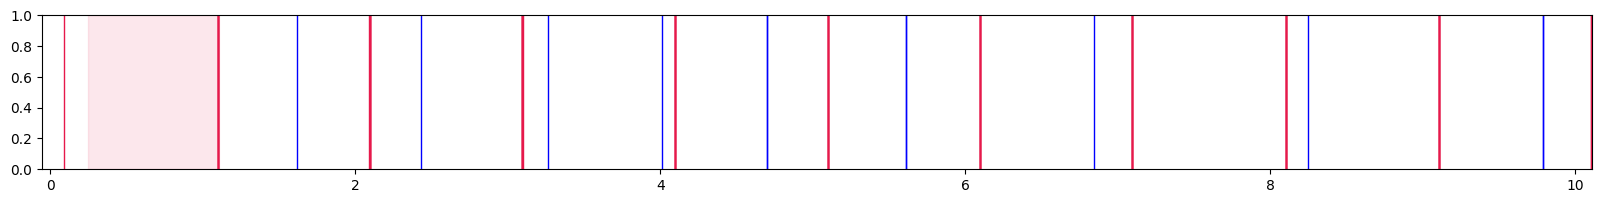

In [7]:

from matplotlib import pyplot as plt
from icua.extras.analysis.plot import plot_timestamps, plot_intervals

fig, ax = plt.subplots(figsize=(20, 2))
# plot the acceptable intervals
fig = plot_intervals(acceptable_intervals, color=SYSTEM_MONITORING_COLOR, alpha=0.1, ax=ax)
# plot the timestamps for the task changed its state due to the task specific agent.
fig = plot_timestamps(df["timestamp"][~df["user"]], color=SYSTEM_MONITORING_COLOR, ax=ax)
# plot the timestamps for the task changed its state due to the user.
fig = plot_timestamps(df["timestamp"][df["user"]], color="blue", ax=ax)

The first "red" event in the plot shows the time at which the task was added to the simulation. Subsequent "red" events show when the task state was changed by the task specific agent (according to its schedule).

The "blue" events show when the user changed the task state by interacting with it (via clicks in this case).


In [ ]:

# Questions for szonya. 
# - Do we want to check the acceptability of all subtasks? 
#